# Gaussian Process - fit a sinoid

Given some dataset of $n$ datapoints, whose mapping assumably represents some non-linear function, our goal is to adopt a Bayesean strategy and directly model this unknown function. For this purpose we will deploy Gaussian Process Models.

1. Simulated data and underlying function
2. Defining necessary functions
3. Fit a Gaussian Process Models on simulated data
4. Predict and plot data

*conclusions* It looks nice below, however, our GP have not observed any of the underlying data and much less its underlying function. Need to modify the condition mechanism for that.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from random import sample

## 1 - Simulated data

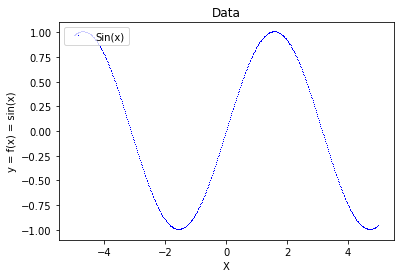

In [76]:
n = 500
X_data = np.linspace(-5, 5, n)
Y_data = np.sin(X_data)
plt.title('Data')
plt.plot(X_data, Y_data, 'b,', label='Sin(x)')
plt.xlabel('X')
plt.ylabel('y = f(x) = sin(x)')
plt.legend(loc='upper left')
plt.show()

## 2 - GP Functions

In [101]:
def kernel(a, b):
    return np.exp(-.5 * 1/.1 * (np.subtract.outer(a, b)**2))
    
def conditional(x_new, x, y):
    A = kernel(x, x)
    B = kernel(x, x_new)
    C = kernel(x_new, x_new)
    mu = np.dot(B.T, np.linalg.inv(A)).dot(y)
    sigma = C - np.dot(B.T, np.linalg.inv(A)).dot(B)
    return (mu.squeeze(), sigma.squeeze())
    
def predict(x, data, K, t):
    Kx = [kernel(x, x_) for x_ in data]
    Kinv = np.linalg.inv(K + 1e-15*np.eye(len(K)))
    y_pred = np.dot(Kx, Kinv).dot(t)
    sigma_new = kernel(x, x) - np.dot(Kx, Kinv).dot(Kx)
    return y_pred, sigma_new

def fit(X_data, Y_data, m=5, art=False):
    # Define m datapoints to condition on
    X_conditional = sample(list(X_data), m)
    X_conditional.sort()
    Y_conditional = np.sin(X_conditional)
    # Store results
    gp = list()
    # Sample first GP from an unconditional Gaussian
    sigma_prior = kernel(0, 0)
    x = [X_conditional[0]]
    y = [np.random.normal(scale=sigma_prior)]
    K = kernel(x, x)
    y_pred, sigmas = np.transpose([predict(i, x, K, y) for i in X_data])
    gp.append((y_pred, sigmas))
    # Sample rest of conditional GP
    for x_new in X_conditional[1:]:
        mu, s = condition(x_new, x, y)
        y_new = np.random.normal(mu, s)
        x.append(x_new)
        y.append(y_new)
        K = kernel(x, x)
        y_pred, sigmas = np.transpose([predict(i, x, K, y) for i in X_data])
        gp.append((y_pred, sigmas))
    if art:
        plt.title('Num observations:' + str(m))
        plt.errorbar(X_data, y_pred, yerr=sigmas, color='b')
        plt.plot(x, y, 'ro', label='observations')
        plt.plot(X_data, Y_data, 'g,', label='true data')
        plt.xlabel('X')
        plt.ylabel('y = f(x) = sin(x)')
        plt.ylim(-np.amax(np.square(y))-.5, np.amax(np.square(y))+.5)
        plt.legend(loc='upper left')
        plt.show()
        
    return gp

## 3 - Fit GPModels on data

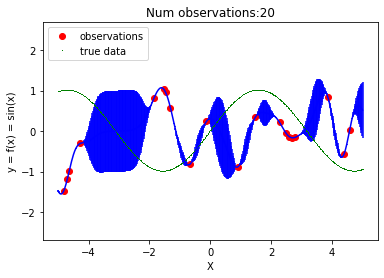

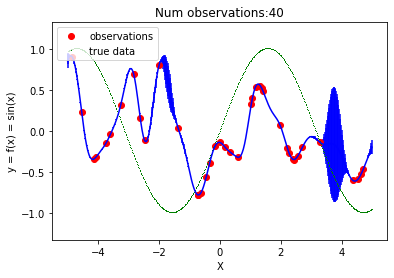

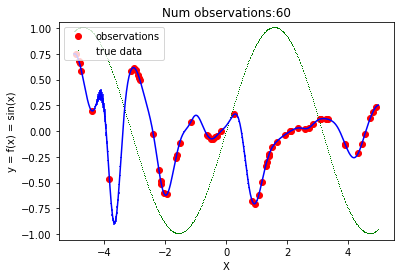

In [110]:
GP = list()
for m in (20, 40, 60):
    GP.append(fit(X_data, Y_data, m=m, art=True))

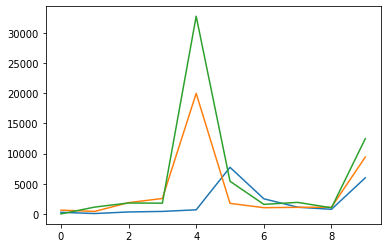

In [115]:
plt.plot(np.histogram(GP[0])[0])
plt.plot(np.histogram(GP[1])[0])
plt.plot(np.histogram(GP[2])[0])